In [2]:
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import cv2

#Load dataset

In [6]:
dataset = io.loadmat('./Data_hoda_full.mat')
dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])

In [7]:
dataset['labels']

array([[6],
       [5],
       [0],
       ...,
       [2],
       [6],
       [6]], dtype=uint8)

In [8]:
dataset['Data']

array([[array([[  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0],
               [  0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0,   0,   0,   0],
               [  0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
                  0,   0,   0,   0, 255, 255,   0],
               [  0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
                  0,   0,   0, 255, 255, 255, 255],
               [  0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
                  0,   0, 255, 255, 255, 255,   0],
               [  0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                  0, 255, 255, 255, 255, 255,   0],
               [255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                255, 255, 255, 255, 255,   0,   0],
               [255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0

In [9]:
dataset['labels'].shape

(60000, 1)

In [10]:
dataset['Data'].shape

(60000, 1)

In [11]:
dataset['Data'][5999][0]

array([[  0,   0, 255, 255, 255,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0],
       [255, 255, 255, 255, 255, 255,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0,   0],
       [  0, 255, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255, 255,   0],
       [  0,   0, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255, 255],
       [  0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   

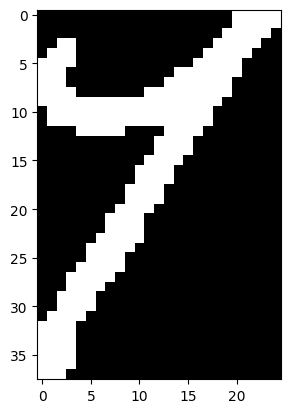

In [12]:
plt.imshow(dataset['Data'][11][0],cmap='gray')

In [13]:
new_data=np.squeeze(dataset['Data'])


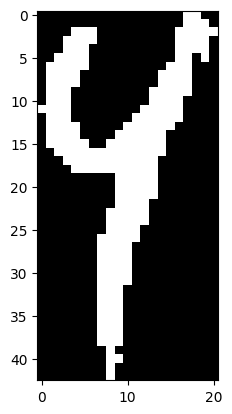

In [14]:
plt.imshow(new_data[20] ,cmap='gray')

# Test and Training set

In [15]:
x_train_original = new_data[:1000]
y_train=np.squeeze(dataset['labels'][:1000])
x_test_original= new_data[1000:1200]
y_test = np.squeeze(dataset['labels'][1000:1200])

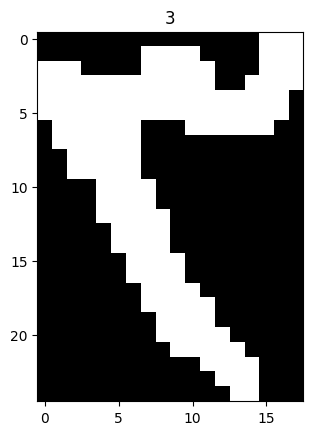

In [16]:
plt.imshow(x_train_original[102],cmap='gray')
plt.title(y_train[102]);

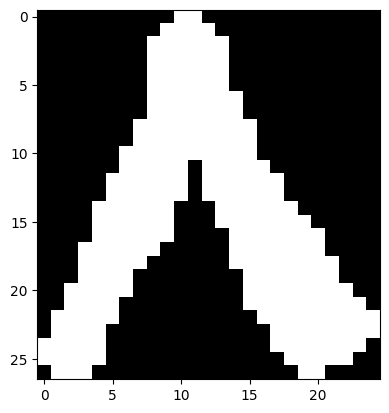

label 70th image is : 8


In [17]:
i=70
image = x_train_original[i]
label = y_train[i]
plt.imshow(image , cmap='gray')
plt.show()
print('label {}th image is : {}'.format(i,label))

# Resize images

In [18]:
x_train_5by5 = [cv2.resize( img , dsize=(5,5)) for img in x_train_original]
x_test_5by5 = [cv2.resize(img , dsize=(5,5)) for img in x_test_original]

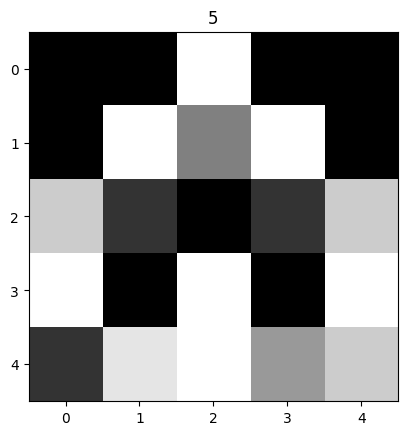

In [19]:
image = x_train_5by5[1]
plt.imshow(image, cmap='gray')
plt.title(y_train[1])
plt.show()

#reshape

In [20]:
x_train = np.reshape(x_train_5by5 , [-1,25])
x_test = np.reshape(x_test_5by5 , [-1,25])

In [21]:
x_train.shape

(1000, 25)

#  create KNN classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np


In [24]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
i=np.expand_dims(x_test[10],axis=0)
neigh.predict(i)

array([0], dtype=uint8)

In [33]:
sample = 25
x=[x_test[sample]]
predicted_class = neigh.predict(x)
print("sample {} is a {} , and my prediction is : {}".format(sample ,y_test[sample],predicted_class[0] ))
print(neigh.predict_proba(x))

sample 25 is a 2 , and my prediction is : 2
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


#predict all sample in x_test

In [36]:
pred_classes = neigh.predict(x_test)
pred_classes

array([7, 2, 3, 1, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 3, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 9, 2, 7, 5, 2, 9, 7, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 2, 7,
       1, 2, 7, 9, 0, 3, 7, 4, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 7, 6,
       2, 4, 1, 4, 4, 5, 9, 1, 8, 2, 0, 5, 6, 2, 4, 3, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 3, 2, 3, 1, 0, 2, 9, 7, 3, 5, 5, 0, 0, 2,
       6, 7, 9, 3, 9, 9, 8, 7, 9, 2, 5, 2, 5, 5, 9, 6, 9, 2, 0, 3, 7, 6,
       5, 2, 9, 0, 4, 1, 8, 2, 2, 3, 0, 2, 9, 3, 8, 6, 7, 0, 9, 9, 0, 7,
       6, 1, 4, 7, 9, 3, 7, 0, 7, 1, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 4, 5, 7, 4, 1, 3, 3, 1, 2, 5, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 4,
       9, 5], dtype=uint8)

# averag of output

In [37]:
np.mean(pred_classes==y_test)

np.float64(0.96)

In [39]:
acc= neigh.score(x_test,y_test)
print('Accuracy is %.1f %%' %(acc*100))

Accuracy is 96.0 %
